In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import plotly.express as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.manifold import TSNE 
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

In [3]:
mush_data_raw = pd.read_csv('/Users/robertmoss/Desktop/Mushroom/agaricus-lepiota_data.csv', header = None)

In [4]:
mush_data_raw.head()

0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

In [5]:
column_names = ['Edible', 'Cap_Shape', 'Cap_Surface', 'Cap-Color','Bruises', 'Odor', 'Gill_Attachment', 'Gill_Spacing','Gill_Size', 'Gill_Color', 'Stalk_Shape', 'Stalk_Root', 'Stalk_Surface_Above_Ring', 'Stalk_Surface_Below_Ring', 'Stalk_Color_Above_Ring', 'Stock_Color_Below_Ring', 'Veil_Type', 'Veil_Color', 'Ring_Number', 'Ring_Type', 'Spor_Print_Color', 'Population', 'Habitat']
mush_data_raw.columns = column_names

In [6]:
mush_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
Edible                      8124 non-null object
Cap_Shape                   8124 non-null object
Cap_Surface                 8124 non-null object
Cap-Color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill_Attachment             8124 non-null object
Gill_Spacing                8124 non-null object
Gill_Size                   8124 non-null object
Gill_Color                  8124 non-null object
Stalk_Shape                 8124 non-null object
Stalk_Root                  8124 non-null object
Stalk_Surface_Above_Ring    8124 non-null object
Stalk_Surface_Below_Ring    8124 non-null object
Stalk_Color_Above_Ring      8124 non-null object
Stock_Color_Below_Ring      8124 non-null object
Veil_Type                   8124 non-null object
Veil_Color                  8124 non-null object
Ring_Number

In [7]:
mush_data_raw.to_csv(r'/Users/robertmoss/Desktop/export_dataframe.csv', index=False, header=True)

In [8]:
mush_data_raw.isnull().sum()

Edible                      0
Cap_Shape                   0
Cap_Surface                 0
Cap-Color                   0
Bruises                     0
Odor                        0
Gill_Attachment             0
Gill_Spacing                0
Gill_Size                   0
Gill_Color                  0
Stalk_Shape                 0
Stalk_Root                  0
Stalk_Surface_Above_Ring    0
Stalk_Surface_Below_Ring    0
Stalk_Color_Above_Ring      0
Stock_Color_Below_Ring      0
Veil_Type                   0
Veil_Color                  0
Ring_Number                 0
Ring_Type                   0
Spor_Print_Color            0
Population                  0
Habitat                     0
dtype: int64

In [9]:
(mush_data_raw =='?').sum()

Edible                         0
Cap_Shape                      0
Cap_Surface                    0
Cap-Color                      0
Bruises                        0
Odor                           0
Gill_Attachment                0
Gill_Spacing                   0
Gill_Size                      0
Gill_Color                     0
Stalk_Shape                    0
Stalk_Root                  2480
Stalk_Surface_Above_Ring       0
Stalk_Surface_Below_Ring       0
Stalk_Color_Above_Ring         0
Stock_Color_Below_Ring         0
Veil_Type                      0
Veil_Color                     0
Ring_Number                    0
Ring_Type                      0
Spor_Print_Color               0
Population                     0
Habitat                        0
dtype: int64

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


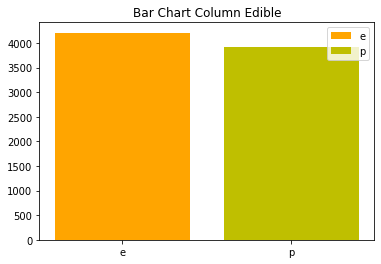

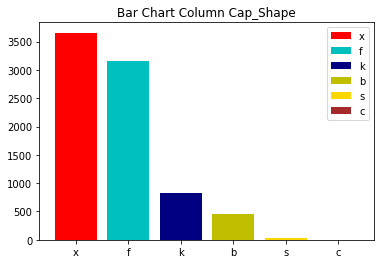

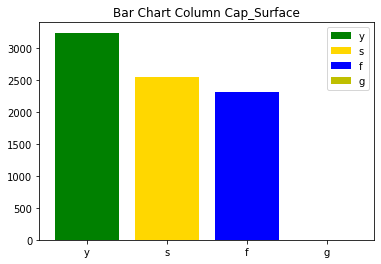

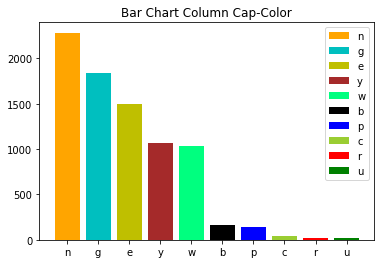

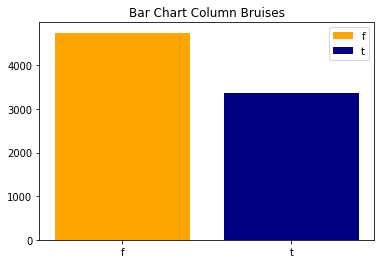

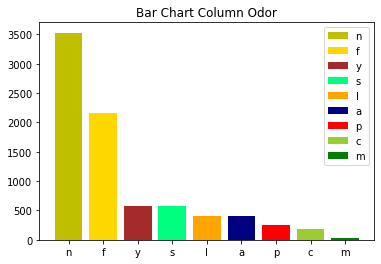

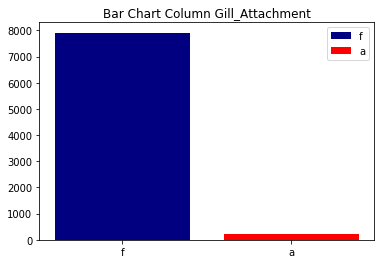

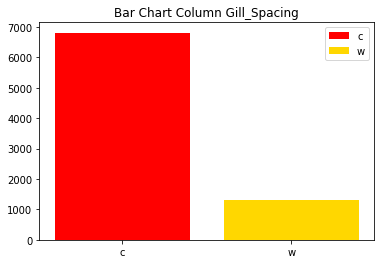

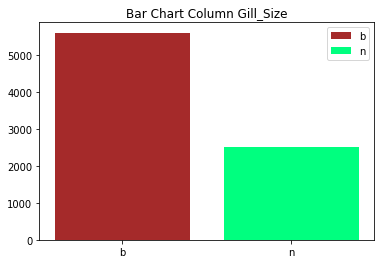

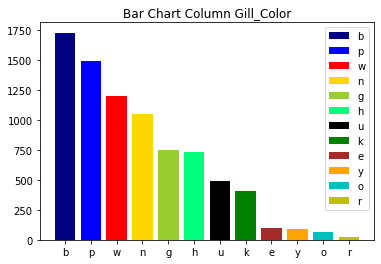

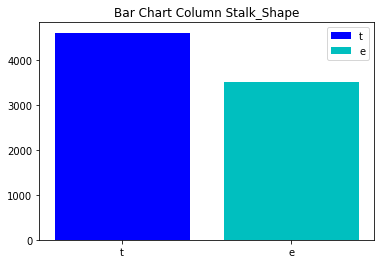

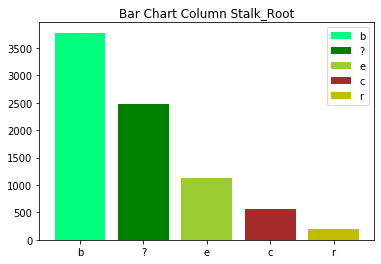

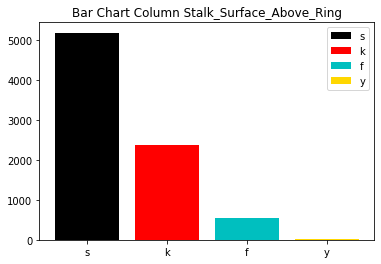

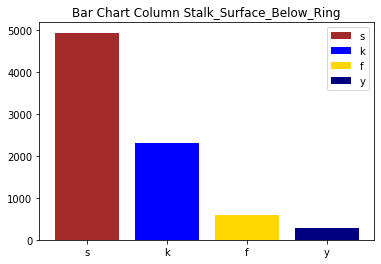

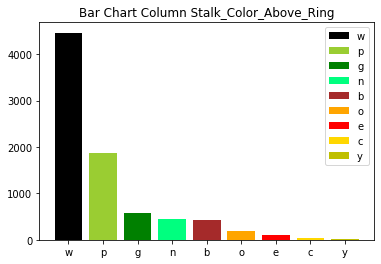

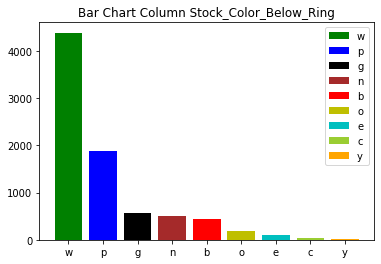

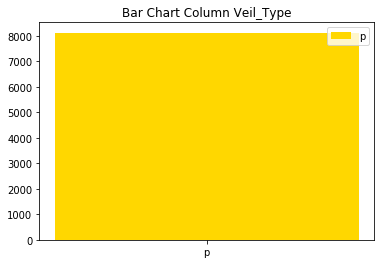

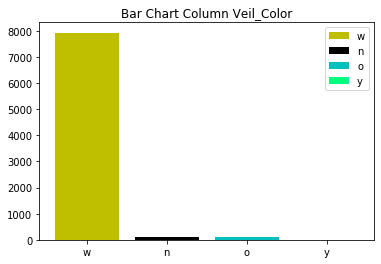

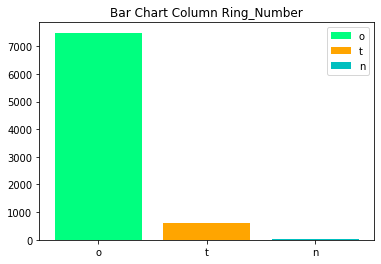

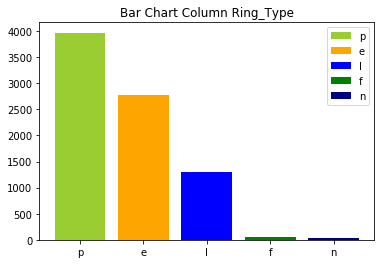

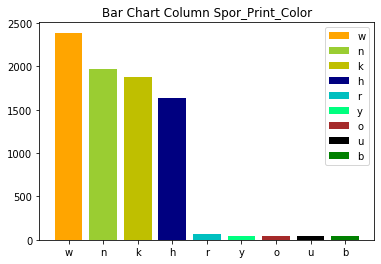

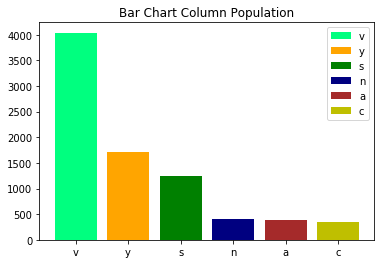

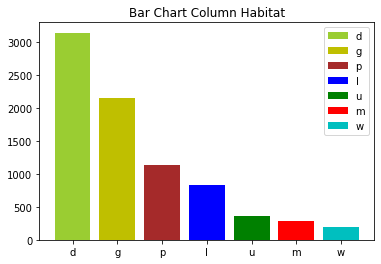

In [10]:
color_array = [ 'r', 'b', 'k', 'g', 'orange', 'c', 'y', 'navy', 'springgreen', 'gold', 'brown', 'yellowgreen']
for column in column_names:
    frequencies =  mush_data_raw[column].value_counts()
    seleceted_colors = np.random.choice(color_array, size = len(frequencies), replace=False)
    plt.figure()
    handles = plt.bar(x=frequencies.index, height=frequencies.values, color=seleceted_colors)
    plt.title(f"Bar Chart Column {column}")
    plt.legend(handles, frequencies.index)

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

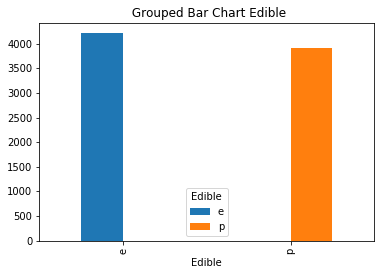

<Figure size 432x288 with 0 Axes>

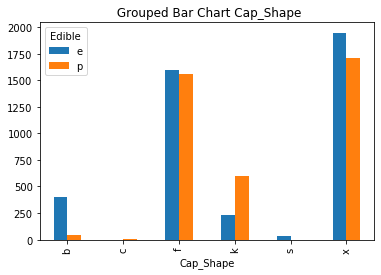

<Figure size 432x288 with 0 Axes>

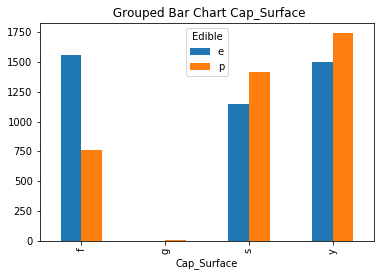

<Figure size 432x288 with 0 Axes>

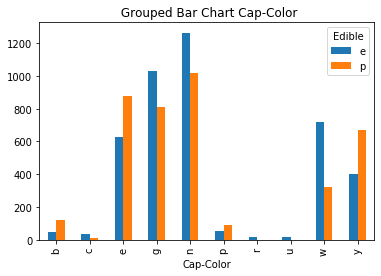

<Figure size 432x288 with 0 Axes>

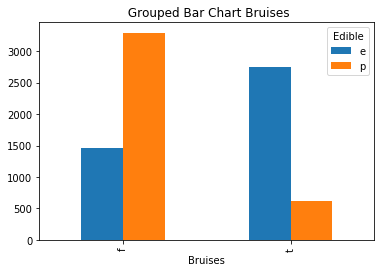

<Figure size 432x288 with 0 Axes>

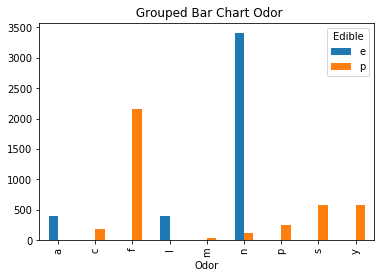

<Figure size 432x288 with 0 Axes>

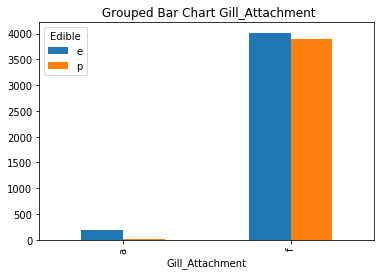

<Figure size 432x288 with 0 Axes>

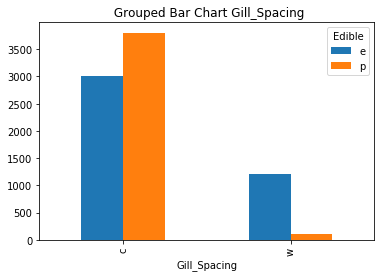

<Figure size 432x288 with 0 Axes>

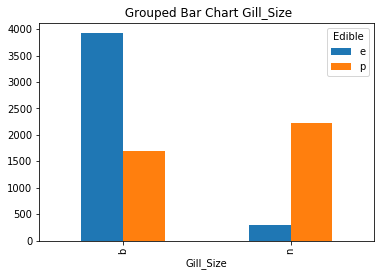

<Figure size 432x288 with 0 Axes>

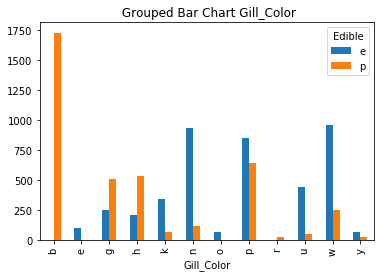

<Figure size 432x288 with 0 Axes>

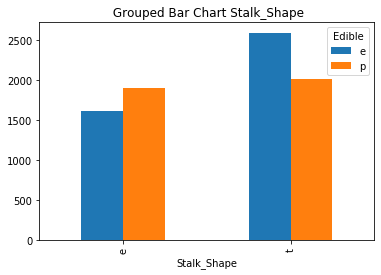

<Figure size 432x288 with 0 Axes>

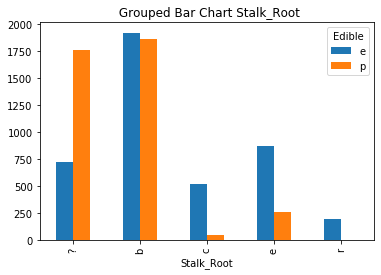

<Figure size 432x288 with 0 Axes>

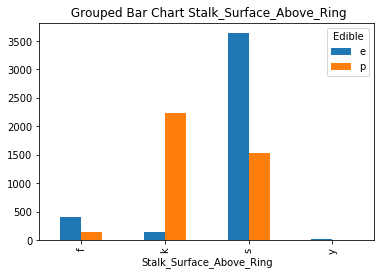

<Figure size 432x288 with 0 Axes>

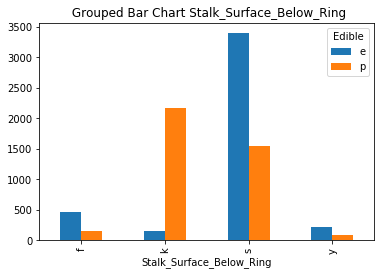

<Figure size 432x288 with 0 Axes>

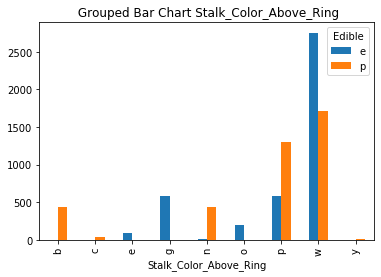

<Figure size 432x288 with 0 Axes>

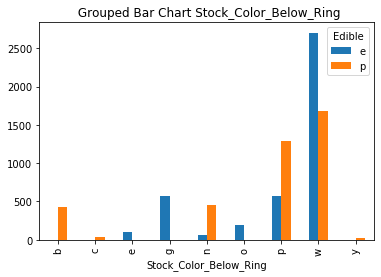

<Figure size 432x288 with 0 Axes>

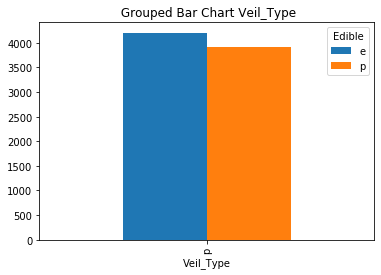

<Figure size 432x288 with 0 Axes>

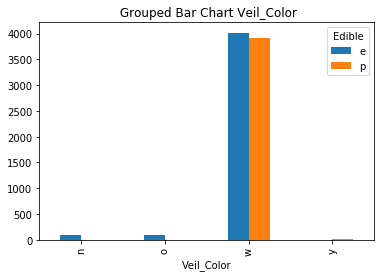

<Figure size 432x288 with 0 Axes>

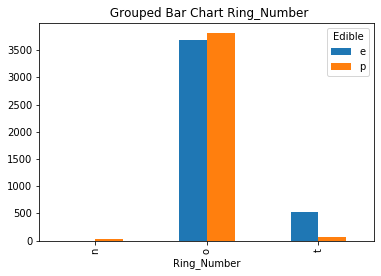

<Figure size 432x288 with 0 Axes>

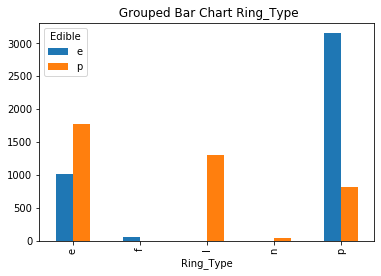

<Figure size 432x288 with 0 Axes>

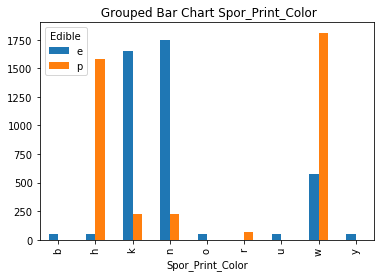

<Figure size 432x288 with 0 Axes>

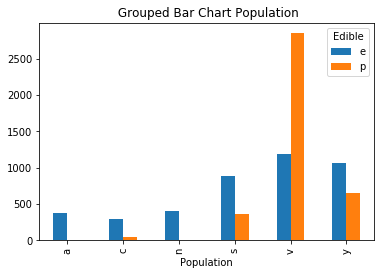

<Figure size 432x288 with 0 Axes>

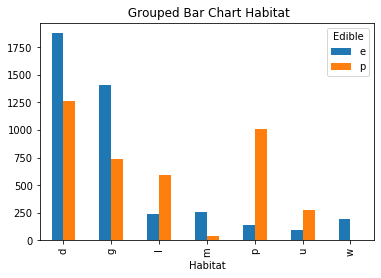

In [11]:
for column in column_names:
    
    tabbed_data = pd.crosstab(columns=mush_data_raw[column],index=mush_data_raw['Edible'])
    tabbed_data = tabbed_data.T
    plt.figure()
    tabbed_data.plot(kind='bar')
    plt.title(f" Grouped Bar Chart {column}")

In [12]:
mush_data_raw = mush_data_raw.drop('Stalk_Root', axis=1)

In [13]:
mush_data_raw = mush_data_raw.drop('Veil_Type', axis=1)

In [14]:
mush_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
Edible                      8124 non-null object
Cap_Shape                   8124 non-null object
Cap_Surface                 8124 non-null object
Cap-Color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill_Attachment             8124 non-null object
Gill_Spacing                8124 non-null object
Gill_Size                   8124 non-null object
Gill_Color                  8124 non-null object
Stalk_Shape                 8124 non-null object
Stalk_Surface_Above_Ring    8124 non-null object
Stalk_Surface_Below_Ring    8124 non-null object
Stalk_Color_Above_Ring      8124 non-null object
Stock_Color_Below_Ring      8124 non-null object
Veil_Color                  8124 non-null object
Ring_Number                 8124 non-null object
Ring_Type                   8124 non-null object
Spor_Print_

In [15]:
duplicate = mush_data_raw[mush_data_raw.duplicated()]
duplicate

Empty DataFrame
Columns: [Edible, Cap_Shape, Cap_Surface, Cap-Color, Bruises, Odor, Gill_Attachment, Gill_Spacing, Gill_Size, Gill_Color, Stalk_Shape, Stalk_Surface_Above_Ring, Stalk_Surface_Below_Ring, Stalk_Color_Above_Ring, Stock_Color_Below_Ring, Veil_Color, Ring_Number, Ring_Type, Spor_Print_Color, Population, Habitat]
Index: []

[0 rows x 21 columns]

In [16]:
y = mush_data_raw['Edible']
y.shape

(8124,)

In [17]:
X = mush_data_raw.drop(['Edible'], axis =1)
X.head()

Cap_Shape Cap_Surface Cap-Color Bruises Odor Gill_Attachment Gill_Spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  Gill_Size Gill_Color Stalk_Shape Stalk_Surface_Above_Ring  \
0         n          k           e                        s   
1         b          k           e                        s   
2         b          n           e                        s   
3         n          n           e                        s   
4         b          k           t                        s   

  Stalk_Surface_Below_Ring Stalk_Color_Above_Ring Stock_Color_Below_Ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  Veil_Color Ring_Number Ring_Type Spor_Print_Color Population Habitat  
0          w           o         p                k          s       u  
1          w           o         p                n          n       g  
2          w           o         p                n          n       m  
3          w           o         p                k          s       u  
4          w           o         e                n          a       g

In [18]:
#ordinal encoder

In [19]:
X_with_dummies = pd.get_dummies(X)
X_with_dummies.head()

Cap_Shape_b  Cap_Shape_c  Cap_Shape_f  Cap_Shape_k  Cap_Shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Cap_Shape_x  Cap_Surface_f  Cap_Surface_g  Cap_Surface_s  Cap_Surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  Population_s  Population_v  Population_y  Habitat_d  Habitat_g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   

   Habitat_l  Habitat_m  Habitat_p  Habitat_u  Habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  

[5 rows x 111 columns]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_with_dummies, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

(6499, 111)
(6499,)


In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_val)

In [22]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       673
           p       1.00      1.00      1.00       627

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [23]:
y_final_test = knn.predict(X_test)
print(classification_report(y_test, y_final_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



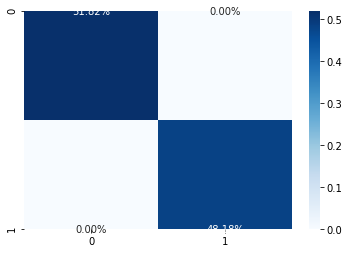

In [24]:
cf_matrix = confusion_matrix(y_test, y_final_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [25]:
pca_2 = PCA(n_components=2)
pca_2_df = pd.DataFrame(pca_2.fit_transform(X_train))
pca_2_df.head()

0         1
0  1.796149  1.760552
1 -1.570072  0.371757
2 -0.673834 -0.204145
3 -0.560345 -0.478781
4 -1.725227  0.275899

In [26]:
explained_variance_2 = pca_2.explained_variance_ratio_
explained_variance_2

array([0.1688444 , 0.13096138])

In [27]:
explained_variance_2 = np.insert(explained_variance_2,0,0)
explained_variance_2

array([0.        , 0.1688444 , 0.13096138])

In [28]:
cumulative_variance_2 = np.cumsum(np.round(explained_variance_2, decimals=3))

In [29]:
pca_2_df_variance = pd.DataFrame(['', 'PCA1', 'PCA2'], columns =['PC'])
explained_variance_df_2 = pd.DataFrame(explained_variance_2, columns=['Explained Variance'])
cumulative_variance_df_2 = pd.DataFrame(cumulative_variance_2, columns=['Cumulative Variance'])

In [30]:
df_pca_2_explained_variance = pd.concat([pca_2_df_variance, explained_variance_df_2, cumulative_variance_df_2], axis=1)
df_pca_2_explained_variance

PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1  PCA1            0.168844                0.169
2  PCA2            0.130961                0.300

In [31]:
fig = py.bar(df_pca_2_explained_variance, x = 'PC', y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_2_explained_variance['PC'], 
    y = df_pca_2_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_2_explained_variance['PC'],
        y = df_pca_2_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [33]:
kmeans_2 = KMeans(n_clusters =23)
kmeans_2.fit(pca_2_df)
kmeans_2.labels_

array([14,  0,  3, ...,  9,  6,  4], dtype=int32)

In [34]:
y_knn_2 = kmeans_2.fit_predict(pca_2_df)

In [35]:
pca_2_cluster_labels = np.unique(kmeans_2.labels_)
n_clusters = pca_2_cluster_labels.shape[0]
silhouette_pca_2_vals = silhouette_samples(pca_2_df,y_knn_2)


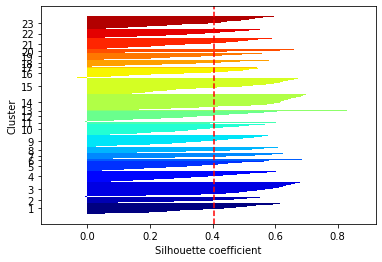

In [36]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(pca_2_cluster_labels):

    c_silhouette_vals = silhouette_pca_2_vals[y_knn_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_pca_2_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, pca_2_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

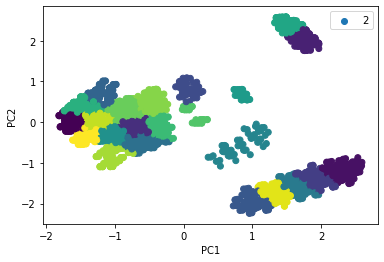

In [37]:
plt.scatter(pca_2_df[0], pca_2_df[1], c=kmeans_2.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(kmeans_2.labels_)

In [38]:
pca_3 = PCA(n_components=3)
pca_3_df = pd.DataFrame(pca_3.fit_transform(X_train), columns=['PCA1', 'PCA2', 'PCA3'])
pca_3_df.head()

PCA1      PCA2      PCA3
0  1.796149  1.760552 -0.904452
1 -1.570072  0.371757  0.430937
2 -0.673834 -0.204146  1.969273
3 -0.560345 -0.478781  1.924753
4 -1.725227  0.275899 -0.942431

In [39]:
explained_variance = pca_3.explained_variance_ratio_
explained_variance

array([0.1688444 , 0.13096138, 0.09315922])

In [40]:
explained_variance = np.insert(explained_variance, 0,0)

In [41]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [42]:
pca_3_df_variance = pd.DataFrame(['', 'PCA1', 'PCA2', 'PCA3'], columns =['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [43]:
df_pca_3_explained_variance = pd.concat([pca_3_df_variance, explained_variance_df, cumulative_variance_df], axis=1)
df_pca_3_explained_variance

PC  Explained Variance  Cumulative Variance
0                  0.000000                0.000
1  PCA1            0.168844                0.169
2  PCA2            0.130961                0.300
3  PCA3            0.093159                0.393

In [44]:
fig = py.bar(df_pca_3_explained_variance, x = 'PC', y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [45]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_3_explained_variance['PC'], 
    y = df_pca_3_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_3_explained_variance['PC'],
        y = df_pca_3_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [46]:
kmeans_3 = KMeans(n_clusters =23)
kmeans_3.fit(pca_3_df)
kmeans_3.labels_

array([22,  5,  4, ..., 11, 19,  1], dtype=int32)

In [47]:
y_knn_3 = kmeans_3.fit_predict(pca_3_df)

In [48]:
pca_3_cluster_labels = np.unique(kmeans_3.labels_)
n_clusters = pca_3_cluster_labels.shape[0]
silhouette_pca_3_vals = silhouette_samples(pca_3_df,y_knn_3)

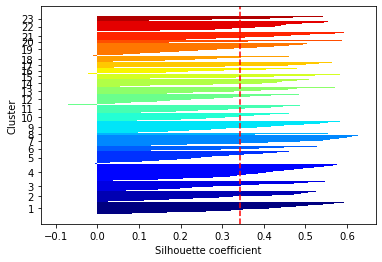

In [49]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(pca_3_cluster_labels):

    c_silhouette_vals = silhouette_pca_3_vals[y_knn_3 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_pca_3_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, pca_3_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [50]:
fig = py.scatter_3d(pca_3_df, x='PCA1', y='PCA2', z='PCA3',
              color=kmeans_3.labels_)

fig.show()

In [51]:
pca_full = PCA() 
pca_df = pd.DataFrame(pca_full.fit_transform(X_train))
pca_df.head()

0         1         2         3         4         5         6    \
0  1.796149  1.760552 -0.904454  0.183174  0.457668 -0.390477  0.098791   
1 -1.570072  0.371757  0.430935 -1.516066  0.194559 -0.472276 -0.427635   
2 -0.673834 -0.204146  1.969273  1.438733 -0.733909 -0.058346 -0.537561   
3 -0.560345 -0.478781  1.924755  1.438857  0.640012 -0.598133 -0.112859   
4 -1.725227  0.275899 -0.942432  0.821971 -0.827129  0.313159  0.023393   

        7         8         9    ...           101           102  \
0  0.065001 -0.144551 -0.057394  ...  2.900883e-16 -4.241576e-17   
1  0.090235  0.308742 -0.781169  ...  3.379547e-16 -2.720834e-16   
2  0.150808  0.397743 -0.699643  ...  4.553784e-17 -2.889741e-16   
3 -0.233029  0.257398  0.658265  ...  1.626223e-16  3.908068e-17   
4  0.125141 -0.263180  0.629625  ...  1.205160e-16 -6.766970e-17   

            103           104           105           106           107  \
0 -4.198152e-16 -8.517436e-16  4.694190e-16  3.802349e-16  5.380390e-17   
1  8.801742e-17  2.793873e-16 -3.936004e-16 -8.711046e-17 -1.457732e-16   
2  3.999979e-16 -3.337158e-16 -7.377490e-16  1.297723e-16  2.898264e-16   
3 -2.053925e-16 -1.790631e-16  2.908893e-16  3.406260e-17 -9.438248e-18   
4 -1.568907e-17  7.041100e-16  6.454639e-17 -6.673540e-16 -2.213091e-16   

            108           109           110  
0 -3.903855e-17 -5.062790e-16 -1.359035e-16  
1  5.699241e-16 -3.144557e-16 -5.037703e-17  
2  3.007783e-16 -9.880662e-16 -3.413570e-17  
3  1.461343e-17 -3.141541e-16 -5.131147e-17  
4  7.586021e-17 -4.311830e-16 -1.619182e-16  

[5 rows x 111 columns]

In [52]:
explained_variance = pca_full.explained_variance_ratio_
explained_variance

array([1.68844399e-01, 1.30961378e-01, 9.31592225e-02, 6.32718690e-02,
       4.00281684e-02, 3.77502211e-02, 3.23865713e-02, 2.86895379e-02,
       2.72056680e-02, 2.22535221e-02, 2.09051725e-02, 1.92784581e-02,
       1.89834763e-02, 1.77942605e-02, 1.58120208e-02, 1.56854039e-02,
       1.52632822e-02, 1.47575619e-02, 1.36870325e-02, 1.19350629e-02,
       1.13319362e-02, 1.05837968e-02, 1.01883731e-02, 9.56634524e-03,
       9.01266809e-03, 8.65812608e-03, 8.35491366e-03, 7.64747033e-03,
       7.56025694e-03, 7.12989594e-03, 6.85042877e-03, 6.76129030e-03,
       5.93987872e-03, 5.52148260e-03, 5.32304555e-03, 5.20985725e-03,
       4.92282398e-03, 4.65193423e-03, 4.61737410e-03, 4.31834537e-03,
       4.15727749e-03, 3.71698574e-03, 3.68851534e-03, 3.37025774e-03,
       3.11595120e-03, 2.86685563e-03, 2.35452796e-03, 2.27736795e-03,
       2.19080870e-03, 2.09699886e-03, 1.94791182e-03, 1.63304005e-03,
       1.45674148e-03, 1.27143947e-03, 1.07540429e-03, 1.03364148e-03,
      

In [53]:
explained_variance = np.insert(explained_variance, 0,0)

In [54]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [55]:
pca_full_df_variance = pd.DataFrame()
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [56]:
df_pca_full_explained_variance = pd.concat([pca_full_df_variance, explained_variance_df, cumulative_variance_df], axis=1)
df_pca_full_explained_variance

Explained Variance  Cumulative Variance
0          0.000000e+00                0.000
1          1.688444e-01                0.169
2          1.309614e-01                0.300
3          9.315922e-02                0.393
4          6.327187e-02                0.456
..                  ...                  ...
107        7.403636e-34                1.000
108        7.403636e-34                1.000
109        5.003979e-34                1.000
110        2.946199e-34                1.000
111        7.993663e-35                1.000

[112 rows x 2 columns]

In [57]:
fig = py.bar(df_pca_full_explained_variance, x = df_pca_full_explained_variance.index , y ='Explained Variance', 
            width = 800)
#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_pca_full_explained_variance.index, 
    y = df_pca_full_explained_variance['Cumulative Variance'],
    marker = dict(size=15, color="LightSeaGreen")))

fig.add_trace(
    go.Bar(
        x = df_pca_full_explained_variance.index,
        y = df_pca_full_explained_variance['Explained Variance'], 
        marker = dict(color="RoyalBlue")))

In [59]:
loadings = pca_full.components_.T
df_loadings = pd.DataFrame(loadings, columns=[f"PC{i+1}" for i in range(pca_df.shape[1])], index=X_train.columns)
df_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Cap_Shape_b -0.030145  0.014606  0.045190 -0.075149  0.052634  0.041658   
Cap_Shape_c -0.000110 -0.000081  0.000175 -0.000270  0.000201  0.000301   
Cap_Shape_f  0.003276  0.035023 -0.079374  0.153159  0.539134 -0.345961   
Cap_Shape_k  0.062778 -0.080880  0.014715 -0.038078  0.075312  0.110970   
Cap_Shape_s -0.001517 -0.000374  0.001781 -0.002763 -0.000936  0.004861   
...               ...       ...       ...       ...       ...       ...   
Habitat_l    0.065852 -0.088021  0.000142 -0.038822  0.070621  0.138633   
Habitat_m   -0.025082  0.008355  0.014176 -0.068196 -0.001495 -0.013355   
Habitat_p    0.106457  0.012126 -0.019381 -0.058684  0.015621 -0.041140   
Habitat_u   -0.021348 -0.002261  0.015911 -0.055681 -0.019263 -0.068367   
Habitat_w   -0.008100 -0.003459  0.008170 -0.024470  0.064260  0.072449   

                  PC7       PC8       PC9      PC10  ...         PC102  \
Cap_Shape_b  0.000359 -0.008943 -0.039280 -0.010148  ...  0.000000e+00   
Cap_Shape_c  0.000004  0.000412 -0.000377 -0.000066  ...  1.355212e-15   
Cap_Shape_f  0.160397  0.148293  0.020206  0.000121  ...  8.079780e-17   
Cap_Shape_k -0.035315 -0.012518 -0.073213 -0.013280  ...  2.456678e-17   
Cap_Shape_s  0.010529  0.021740  0.003595  0.000771  ...  2.183443e-16   
...               ...       ...       ...       ...  ...           ...   
Habitat_l    0.082482 -0.070652  0.138304  0.006494  ... -4.488886e-02   
Habitat_m   -0.007944 -0.022411 -0.011900 -0.004566  ... -4.488886e-02   
Habitat_p   -0.054795 -0.036377  0.032002  0.007870  ... -4.488886e-02   
Habitat_u    0.103885  0.021584  0.008823  0.013271  ... -4.488886e-02   
Habitat_w   -0.054786 -0.053446 -0.079259 -0.000471  ... -4.488886e-02   

                    PC103         PC104         PC105         PC106  \
Cap_Shape_b  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00   
Cap_Shape_c -6.081246e-16  2.171452e-15  1.975137e-16  1.680117e-16   
Cap_Shape_f  3.839920e-17  2.449922e-19 -7.444524e-17 -5.918950e-17   
Cap_Shape_k  6.388531e-17 -3.922586e-17 -5.143345e-17 -6.545183e-17   
Cap_Shape_s -9.256423e-17 -1.967422e-16  4.496178e-17 -5.347680e-16   
...                   ...           ...           ...           ...   
Habitat_l    1.051821e-02  7.342640e-03 -1.491168e-02  2.163638e-02   
Habitat_m    1.051821e-02  7.342640e-03 -1.491168e-02  2.163638e-02   
Habitat_p    1.051821e-02  7.342640e-03 -1.491168e-02  2.163638e-02   
Habitat_u    1.051821e-02  7.342640e-03 -1.491168e-02  2.163638e-02   
Habitat_w    1.051821e-02  7.342640e-03 -1.491168e-02  2.163638e-02   

                    PC107         PC108         PC109         PC110  \
Cap_Shape_b  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00   
Cap_Shape_c  1.922896e-15 -9.895340e-17  6.964605e-16  1.179913e-15   
Cap_Shape_f  4.270534e-17  2.644590e-17 -1.434498e-16  7.003449e-17   
Cap_Shape_k -1.762511e-17  3.629666e-17 -1.788225e-16  9.593426e-17   
Cap_Shape_s -5.816736e-16 -7.670981e-17  1.885903e-16 -1.205463e-15   
...                   ...           ...           ...           ...   
Habitat_l   -9.893522e-03  8.299699e-05 -3.907465e-02 -2.610450e-02   
Habitat_m   -9.893522e-03  8.299699e-05 -3.907465e-02 -2.610450e-02   
Habitat_p   -9.893522e-03  8.299699e-05 -3.907465e-02 -2.610450e-02   
Habitat_u   -9.893522e-03  8.299699e-05 -3.907465e-02 -2.610450e-02   
Habitat_w   -9.893522e-03  8.299699e-05 -3.907465e-02 -2.610450e-02   

                    PC111  
Cap_Shape_b -0.000000e+00  
Cap_Shape_c  3.767819e-15  
Cap_Shape_f  1.048076e-16  
Cap_Shape_k  2.562306e-17  
Cap_Shape_s  9.268241e-17  
...                   ...  
Habitat_l    1.054012e-01  
Habitat_m    1.054012e-01  
Habitat_p    1.054012e-01  
Habitat_u    1.054012e-01  
Habitat_w    1.054012e-01  

[111 rows x 111 columns]

In [60]:
pca_40_df = pca_df.iloc[:,:40]
kmeans_full = KMeans(n_clusters=23)
kmeans_full.fit(pca_40_df)
print(kmeans_full.labels_)
y_knn_full = kmeans_full.predict(pca_40_df)
y_knn_full

[19 14  4 ... 21  0 16]


array([19, 14,  4, ..., 21,  0, 16], dtype=int32)

In [61]:
pca_40_cluster_labels = np.unique(kmeans_full.labels_)
n_clusters = pca_40_cluster_labels.shape[0]
silhouette_pca_full_vals = silhouette_samples(pca_40_df,y_knn_full)

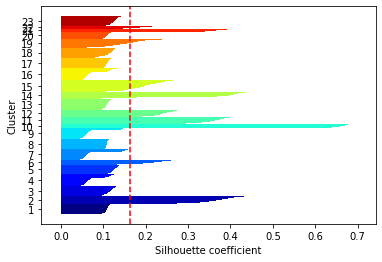

In [62]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(pca_40_cluster_labels):

    c_silhouette_vals = silhouette_pca_full_vals[y_knn_full == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_pca_full_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, pca_40_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [63]:
#TSNE

In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [65]:
tsne_pca_40 = tsne.fit_transform(pca_40_df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5199 samples in 0.007s...
[t-SNE] Computed neighbors for 5199 samples in 1.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5199
[t-SNE] Computed conditional probabilities for sample 2000 / 5199
[t-SNE] Computed conditional probabilities for sample 3000 / 5199
[t-SNE] Computed conditional probabilities for sample 4000 / 5199
[t-SNE] Computed conditional probabilities for sample 5000 / 5199
[t-SNE] Computed conditional probabilities for sample 5199 / 5199
[t-SNE] Mean sigma: 0.965903
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.875443
[t-SNE] KL divergence after 300 iterations: 2.187770


In [66]:
df_tsne = pd.DataFrame({"tsne-2d-one":tsne_pca_40[:,0],"tsne-2d-two":tsne_pca_40[:,1], "y": y_knn_full })
df_tsne

tsne-2d-one  tsne-2d-two   y
0       -3.400821     2.017574  19
1       -0.166614    -7.730685  14
2       -3.519496    -9.538291   4
3       -7.249224    -7.070861  22
4       -2.282694    10.396239   2
...           ...          ...  ..
5194    -1.152313     5.375406   2
5195    -8.378079     4.515944  15
5196     2.904131    -4.662941  21
5197     2.678147    -0.254201   0
5198     8.255991     4.330522  16

[5199 rows x 3 columns]

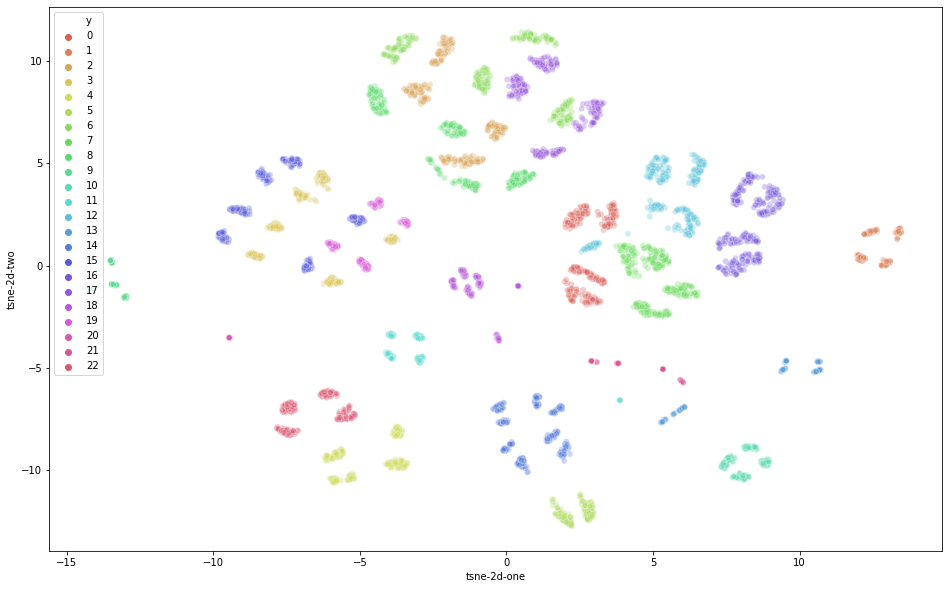

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 23),
    data=df_tsne,
    legend="full",
    alpha=0.3
)

In [68]:
tsne_cluster_labels = np.unique(y_knn_full)
n_clusters = 23
silhouette_tsne_full_vals = silhouette_samples(pca_40_df,y_knn_full)

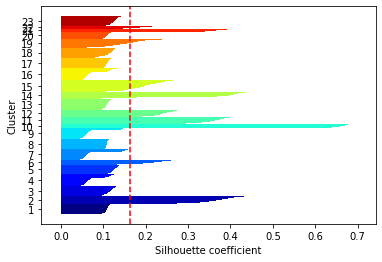

In [69]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(tsne_cluster_labels):

    c_silhouette_vals = silhouette_tsne_full_vals[y_knn_full == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_tsne_full_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, tsne_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [70]:
#aggolmerative clustering

In [71]:
ac_23 = AgglomerativeClustering(n_clusters=23, affinity='euclidean', linkage='complete')
ac_23_labels = ac_23.fit_predict(pca_40_df)
print('Cluster labels: %s' %ac_23_labels)

Cluster labels: [ 3  0  6 ... 17  8 18]


In [72]:
ac_23_cluster_labels = np.unique(ac_23_labels)
n_clusters = 23
silhouette_ac_23_full_vals = silhouette_samples(pca_40_df,ac_23_labels)

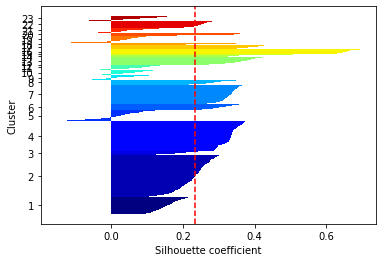

In [73]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(ac_23_cluster_labels):

    c_silhouette_vals = silhouette_ac_23_full_vals[ac_23_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_ac_23_full_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, ac_23_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [74]:
def plot_dendrogram(model, **kwargs):
    

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = pca_40_df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=, n_clusters=23, compute_distances=True)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

SyntaxError: invalid syntax (<ipython-input-74-a432d776785e>, line 26)

In [95]:
# Grid Search 



def silhouette_score(estimator, X):
    clusters = estimator.fit_predict(X)
    row_dist = pd.DataFrame(squareform(pdist(X, metric='euclidean')))
    score = silhouette_score(row_dist, clusters)
    return score

param_grid_aggol = {'n_clusters':[23],
                    'affinity':['l1', 'l2', 'manhattan', 'cosine'],
                   'linkage':['average', 'complete', 'single']}

algo_gs = AgglomerativeClustering()

gs_algo = GridSearchCV(
    algo_gs,
    param_grid=param_grid_aggol,
    scoring=silhouette_score)

gs_algo.fit(row_dist)

/Users/robertmoss/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



AttributeError: 'DataFrame' object has no attribute 'fit_predict'

In [75]:
#hierarchical clustering using a distance maxtrix. 

In [76]:
row_dist = pd.DataFrame(squareform(pdist(pca_40_df, metric='euclidean')))
row_dist

0         1         2         3         4         5         6     \
0     0.000000  4.978866  5.403105  5.208823  5.048903  5.021817  5.009369   
1     4.978866  0.000000  4.328529  4.592292  4.155126  3.574754  4.786234   
2     5.403105  4.328529  0.000000  2.983364  4.407377  4.585994  2.744787   
3     5.208823  4.592292  2.983364  0.000000  4.396354  4.999639  3.290529   
4     5.048903  4.155126  4.407377  4.396354  0.000000  4.190609  4.856081   
...        ...       ...       ...       ...       ...       ...       ...   
5194  4.406758  4.375404  4.835326  4.402703  2.439837  4.847351  4.843314   
5195  3.350297  5.210472  4.791477  5.224669  5.038657  4.825632  5.025778   
5196  5.153767  5.142309  4.138485  4.299611  5.187214  4.875137  4.121643   
5197  4.610987  4.842603  4.595786  4.384215  5.073912  4.603534  4.640942   
5198  4.155202  5.560100  5.228238  5.042489  5.453305  5.609052  5.033230   

          7         8         9     ...      5189      5190      5191  \
0     4.818003  3.006125  4.175454  ...  4.393826  5.076035  5.372434   
1     4.631299  5.017178  5.425075  ...  5.607321  4.639810  4.801482   
2     4.803884  5.188515  5.038432  ...  5.237069  4.880125  2.937812   
3     4.622342  5.011975  4.641240  ...  5.048594  5.065958  3.242797   
4     3.081139  5.223148  5.081026  ...  5.455611  4.715336  4.597873   
...        ...       ...       ...  ...       ...       ...       ...   
5194  3.072089  5.019135  4.877535  ...  5.075980  4.709736  5.017911   
5195  5.265047  3.140257  4.866236  ...  4.641611  4.876309  4.969569   
5196  4.951299  5.281602  4.569943  ...  4.576028  4.595299  4.467440   
5197  5.080157  4.855953  3.440367  ...  3.437426  5.290241  4.820771   
5198  5.031991  4.616248  2.772163  ...  2.386218  4.901949  4.778728   

          5192      5193      5194      5195      5196      5197      5198  
0     3.610593  4.976259  4.406758  3.350297  5.153767  4.610987  4.155202  
1     5.222243  4.701281  4.375404  5.210472  5.142309  4.842603  5.560100  
2     5.022407  4.081747  4.835326  4.791477  4.138485  4.595786  5.228238  
3     5.428537  4.316929  4.402703  5.224669  4.299611  4.384215  5.042489  
4     4.653492  4.578389  2.439837  5.038657  5.187214  5.073912  5.453305  
...        ...       ...       ...       ...       ...       ...       ...  
5194  5.066666  4.807447  0.000000  4.821897  4.989283  4.868027  5.073226  
5195  3.065275  4.772765  4.821897  0.000000  4.898452  5.050874  4.414176  
5196  4.967454  3.768835  4.989283  4.898452  0.000000  4.325664  4.050790  
5197  5.265432  4.825757  4.868027  5.050874  4.325664  0.000000  3.920738  
5198  4.843651  5.167788  5.073226  4.414176  4.050790  3.920738  0.000000  

[5199 rows x 5199 columns]

In [77]:
row_clusters = linkage(pdist(pca_40_df, metric='euclidean'), method='complete')

In [78]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust'], index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

row label 1  row label 2  distance  no. of items in clust
cluster 1           308.0        331.0  0.010088                    2.0
cluster 2          2512.0       4030.0  0.010088                    2.0
cluster 3          2111.0       2349.0  0.010088                    2.0
cluster 4          1448.0       3086.0  0.010088                    2.0
cluster 5           206.0       4447.0  0.010088                    2.0
...                   ...          ...       ...                    ...
cluster 5194      10388.0      10390.0  5.272188                 1440.0
cluster 5195      10386.0      10391.0  5.433040                 1789.0
cluster 5196      10368.0      10389.0  5.470274                 1970.0
cluster 5197      10392.0      10393.0  5.604860                 3229.0
cluster 5198      10394.0      10395.0  5.795170                 5199.0

[5198 rows x 4 columns]

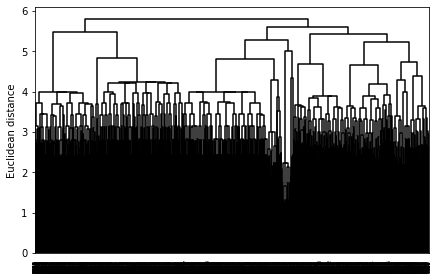

In [79]:
set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, color_threshold=np.inf)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [80]:
#DSNE Clustering

In [81]:
db = DBSCAN(eps=0.2, min_samples=5, metric = "euclidean")
y_db = db.fit_predict(pca_40_df)
np.unique(y_db)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [82]:
DSNE_cluster_labels = np.unique(y_db)
n_clusters = len(DSNE_cluster_labels)
silhouette_DSNE_full_vals = silhouette_samples(pca_40_df,y_db)

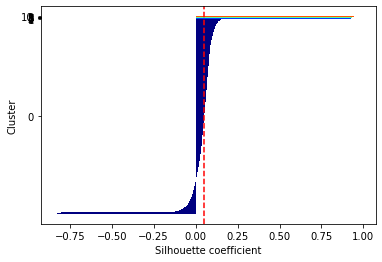

In [83]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(DSNE_cluster_labels):

    c_silhouette_vals = silhouette_DSNE_full_vals[y_db == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_DSNE_full_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, DSNE_cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()